## 2.1 Introduction<a id='2.2_Introduction'></a>


This step focuses on collecting your data, organizing it, and making sure it's well defined. 

### 2.1.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>


In this project, we are trying to create a fraud detection system to predict fraud from the data provided on kaggle 
https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection

## 2.2 Imports<a id='2.3_Imports'></a>

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2.3 Objectives<a id='2.4_Objectives'></a>

The objectives of this project is to determine the variables leading to fraudulent transactions in auto claims

## 2.4 Load The Vehicle Claim Data 

In [2]:
vf = pd.read_csv("fraud_oracle.csv")

In [3]:
#Calling  the info method on vf to see info about the data
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

<b> Luckily the data looks pretty clean without any missing values<b>

In [4]:
# Verifying the number of missing values in each feature
vf.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

##### We do not have any missing values

In [5]:
# Calling  the head method on vf to print the first several rows of the data
vf.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [6]:
vf.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

 Amongst the column list above most of the column seems categorical, apart from deductible.
 Since we are trying to model the fraudulent transaction the " FraudFound_P" is our target variable which is binary 

## 2.5 Checking the numerical features 


In [7]:
vf.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Amongst the numeric features week of month, week of month claimed, fraud found, driver rating seems categorical and since policy number, rep number are distinct values,they need to be converted to string

## 2.6  Checking for categorical and numerical columns based on unique values. 

In [8]:
vf.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

**It seems all the columns except agein years ( which is discrete in our case), should be categorical as none of the columns apart from policy number have many values. Even policy number cannot be numerical and is nominal categorical data. We cannot get any insight from the policy number as is so we are most likely to drop this later.** 
https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

## 2.7  Checking histograms of numerical features so far according to the data

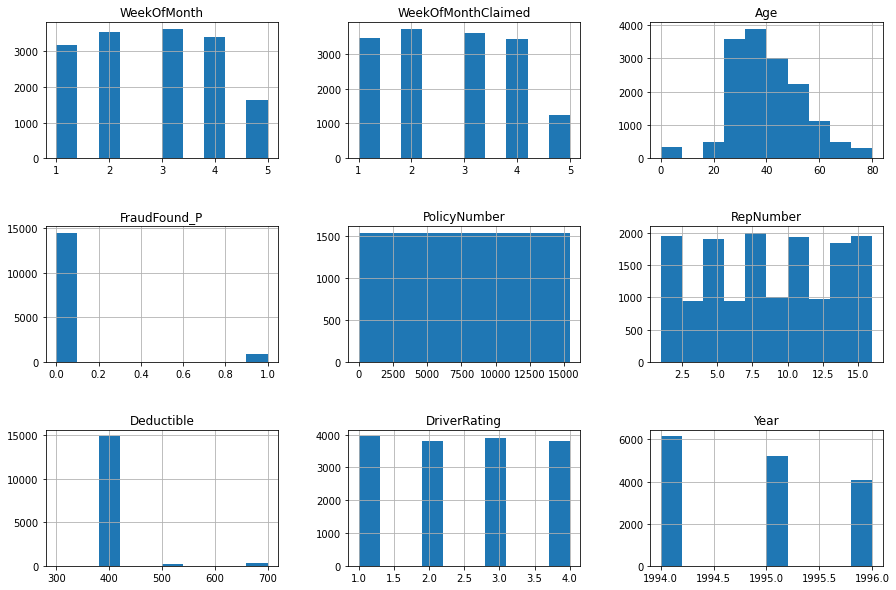

In [9]:
vf.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

####  1. Policy numbers looks randomly distributed, may be it is just a serial number
####  2. Most of the deductibles are in 3 categories. Most commonly involved in claims is 400
####  3. Driver Rating are somewhat equally distributed
####  4. Fraudulent claims have very small proportion 
####  5. Only 3 years of cars showing in the data and year 1994 ( older cars) have more involvement in accidents

## 2.8 Checking the distribution of Categorical Columns

In [10]:
### 1. Month

In [11]:
### https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas
### Proportional distribution of month values
item_counts = vf['Month'].value_counts(normalize=True)
print(item_counts)

Jan    0.091505
May    0.088651
Mar    0.088197
Jun    0.085668
Oct    0.084630
Dec    0.083333
Apr    0.083009
Feb    0.082101
Jul    0.081518
Sep    0.080415
Nov    0.077886
Aug    0.073087
Name: Month, dtype: float64


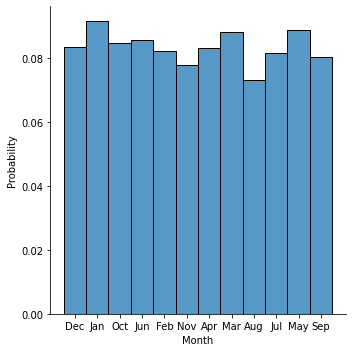

In [12]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
sns.displot(x ='Month',stat="probability",palette = 'hls',data = vf)
plt.tight_layout()
plt.show()


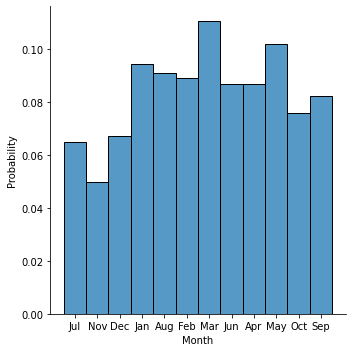

In [13]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.displot(x ='Month',stat="probability",data = vf2)
plt.tight_layout()
plt.show()


**Amongst fraudulent cases months of March and May has relatively higher probablity**


Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


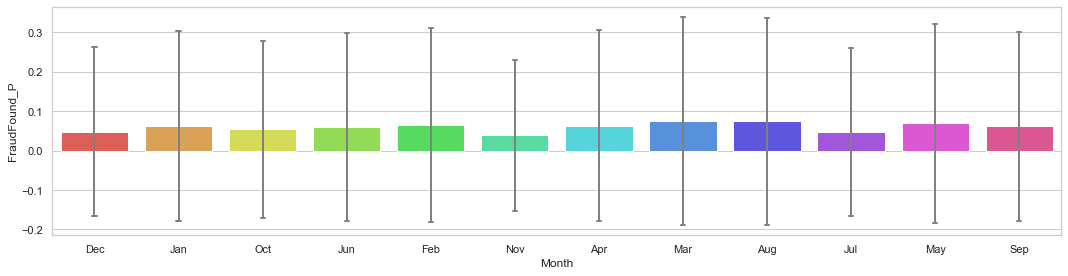

In [14]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Month', y = 'FraudFound_P', data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Month']).mean()['FraudFound_P'])
print(vf.groupby(['Month']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

## 2.9.Checking the make of the vehicle

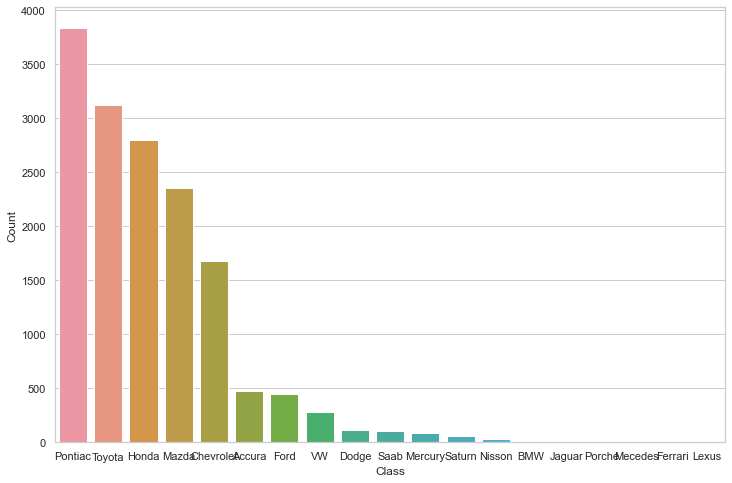

In [15]:


plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="Make",order=vf['Make'].value_counts().index ,data=vf)
ax3.set(xlabel='Class', ylabel='Count')


plt.show()

**Pontiac, Toyota, Honda, Mazda and Chevrolet are the top 5 makes involved in claims**

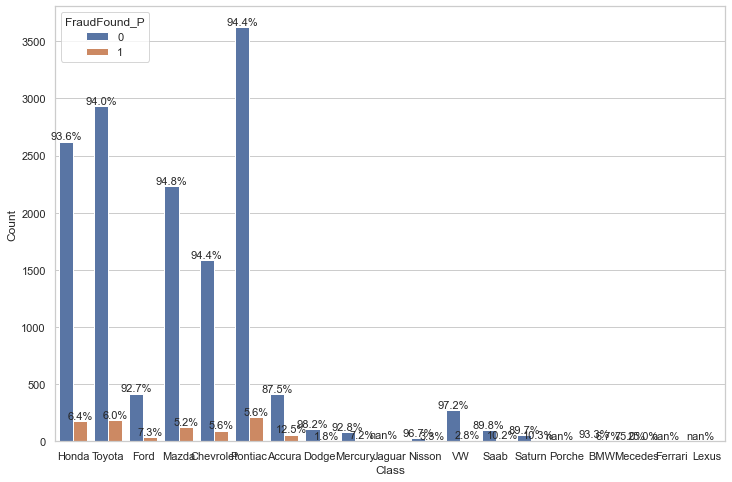

In [16]:
### https://stackoverflow.com/questions/69690399/how-to-add-percentages-on-countplot-in-seaborn
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

#df = sns.load_dataset("titanic")

plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="Make",hue="FraudFound_P" ,data=vf)
ax3.set(xlabel='Class', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Make
Accura       0.125000
BMW          0.066667
Chevrolet    0.055919
Dodge        0.018349
Ferrari      0.000000
Ford         0.073333
Honda        0.063906
Jaguar       0.000000
Lexus        0.000000
Mazda        0.052251
Mecedes      0.250000
Mercury      0.072289
Nisson       0.033333
Pontiac      0.055512
Porche       0.000000
Saab         0.101852
Saturn       0.103448
Toyota       0.059596
VW           0.028269
Name: FraudFound_P, dtype: float64
Make
Accura       0.331070
BMW          0.258199
Chevrolet    0.229834
Dodge        0.134829
Ferrari      0.000000
Ford         0.260973
Honda        0.244629
Jaguar       0.000000
Lexus             NaN
Mazda        0.222581
Mecedes      0.500000
Mercury      0.260540
Nisson       0.182574
Pontiac      0.229007
Porche       0.000000
Saab         0.303863
Saturn       0.307203
Toyota       0.236775
VW           0.166033
Name: FraudFound_P, dtype: float64


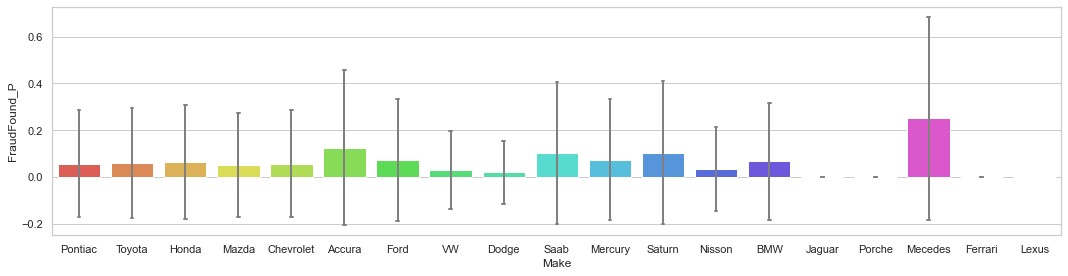

In [17]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Make', y = 'FraudFound_P', data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,
            order=vf['Make'].value_counts().index,
            ci = 'sd'   
            )

print(vf.groupby(['Make']).mean()['FraudFound_P'])
print(vf.groupby(['Make']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

**Surprisingly the highest probablity of fraudulent transactions is in high end cars like Accura and Mercedes, most likely due to higher incentive for frauds as the cars being costlier**

## 2.10. Checking for the distribution of total claims columns

In [18]:
vf['FraudFound_P'].value_counts()


0    14497
1      923
Name: FraudFound_P, dtype: int64

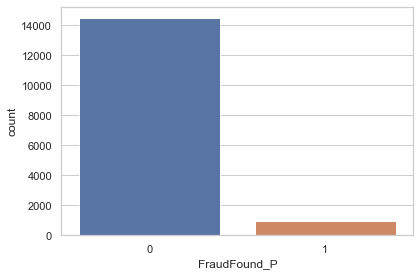

In [19]:
sns.countplot(x='FraudFound_P',data=vf)
plt.tight_layout()
plt.show()

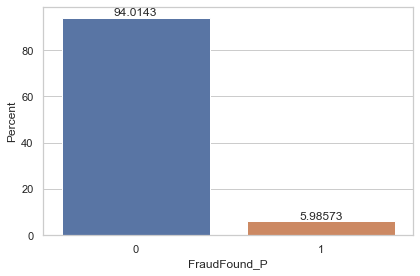

In [20]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax = sns.barplot(x='FraudFound_P', y='FraudFound_P', data=vf, estimator=lambda x: len(x) / len(vf) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### Close to 94% (14497 claims) tranaction are fair and 6%(923 claims) are fraudulent. 

##  2.11 Checking the contribution of sex type on fruadulent and legitimate claims


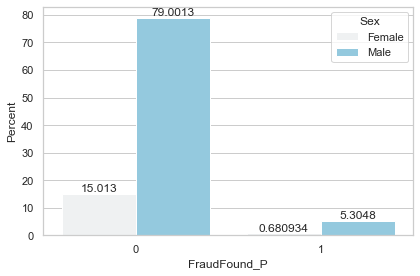

In [21]:
sns.set(style="whitegrid")
ax=sns.barplot(data=vf,x='FraudFound_P', y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()


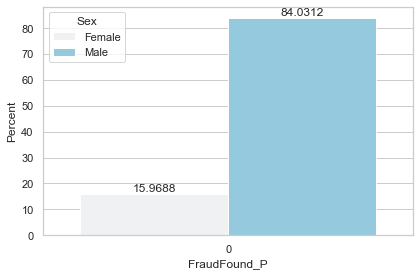

In [22]:
vf1=vf.loc[vf['FraudFound_P']==0]
sns.set(style="whitegrid")  
ax=sns.barplot(data=vf1,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf1) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
    plt.tight_layout()
plt.show()

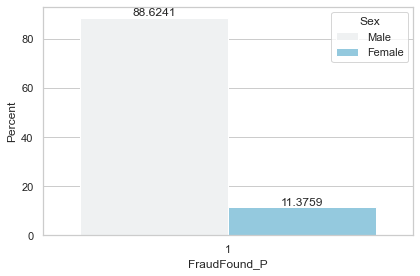

In [23]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf2,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

#### "Amongst the total claims males contribute 84.03% for non-fraudulent transactions but contribute 88.62% of fraudulent transactions. Males are more likely to submit fraudulent claims")<b>

## 2.12 Checking for relation between week of month and fraud probablistically

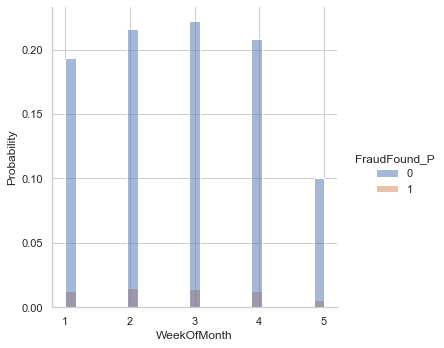

In [24]:
sns.displot(x ='WeekOfMonth', hue = "FraudFound_P",stat="probability",data = vf)
 
# Show the plot
plt.show()

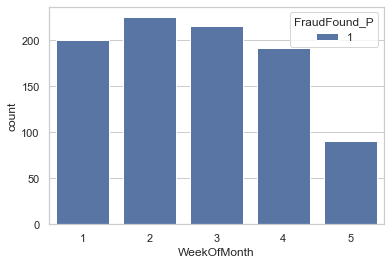

In [25]:
sns.countplot(x ='WeekOfMonth', hue = "FraudFound_P", data = vf2)
 
# Show the plot
plt.show()

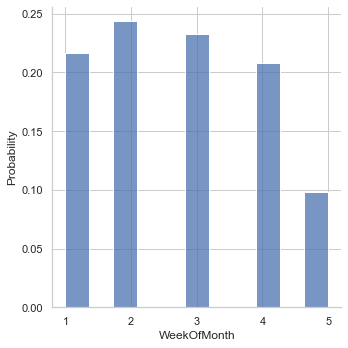

In [26]:
sns.displot(x ='WeekOfMonth',stat="probability",data = vf2)
 
# Show the plot
plt.show()

##  2.13. Checking for fraudulent transactions by age column

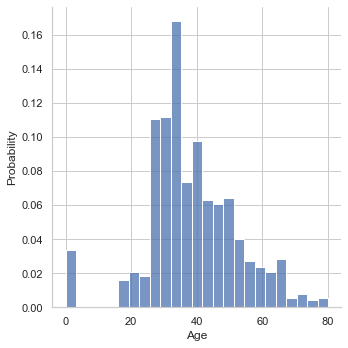

In [27]:
sns.displot(x ='Age',stat="probability",data = vf2)
 
# Show the plot
plt.show()

### There are several readings for age=0, which canot be driver .At this point we are not sure what that age column is. Interesting observation is the distribution of age groups and it seems like most case are clustered between age 20 and 60 with significant increase in fraudulent activities for age group 30 to40

## 2.14 Checking value counts for age <20 as several values are showing 0 age

In [28]:
### Proportional distribution of age values
#vf1=vf.loc[vf['FraudFound_P']==0]
vf4=vf.loc[vf['Age']<20]
vf4['Age'].value_counts()

0     320
18     48
19     32
16      9
17      6
Name: Age, dtype: int64

**This indicates there are 320 instances when the age is recorded as 0**

## 2.16 Age column when its value is 0 requires further investigation
**There is a seperate column for age of policy holder which is already binned in 9 buckets
 It may indicate that Age column defines the age of driver which could be different from policy holder?**


In [29]:
vf5=vf.loc[vf['Age']==0]
vf5.head().T

,7,13,28,31,58
Month,Nov,Jan,Jul,Mar,May
WeekOfMonth,1,5,1,1,1
DayOfWeek,Friday,Friday,Saturday,Sunday,Monday
Make,Honda,Honda,Honda,Honda,Honda
AccidentArea,Urban,Rural,Urban,Urban,Rural
DayOfWeekClaimed,Tuesday,Wednesday,Tuesday,Tuesday,Wednesday
MonthClaimed,Mar,Feb,Sep,Mar,May
WeekOfMonthClaimed,4,1,4,2,4
Sex,Male,Male,Male,Male,Male
MaritalStatus,Single,Single,Single,Single,Single


In [33]:
vf5.nunique()

Month                    12
WeekOfMonth               5
DayOfWeek                 7
Make                      2
AccidentArea              2
DayOfWeekClaimed          6
MonthClaimed             13
WeekOfMonthClaimed        5
Sex                       1
MaritalStatus             1
Age                       1
Fault                     2
PolicyType                7
VehicleCategory           3
VehiclePrice              3
FraudFound_P              2
PolicyNumber            320
RepNumber                16
Deductible                2
DriverRating              4
Days_Policy_Accident      1
Days_Policy_Claim         2
PastNumberOfClaims        4
AgeOfVehicle              3
AgeOfPolicyHolder         1
PoliceReportFiled         2
WitnessPresent            2
AgentType                 2
NumberOfSuppliments       3
AddressChange_Claim       4
NumberOfCars              3
Year                      3
BasePolicy                3
dtype: int64

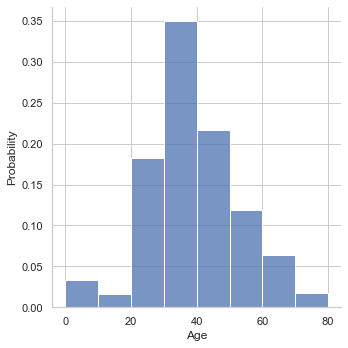

In [34]:
ax=sns.displot(x ='Age',stat="probability",bins=8,data = vf2)
# Show the plot
plt.show()

### Age group 30-40 is most probable (0.35) had more incidences of fraudulent transaction compared to other age groups

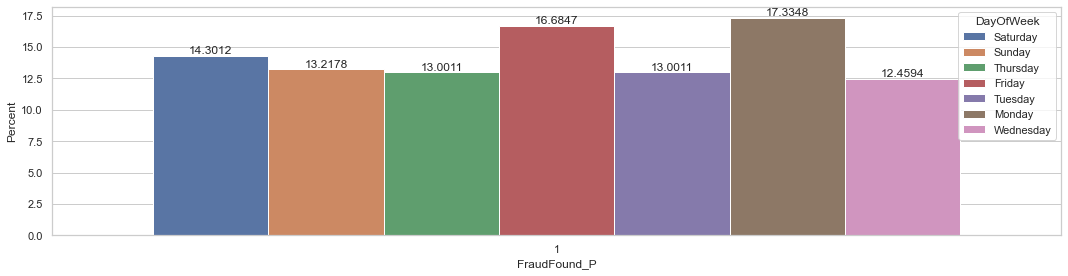

In [35]:

sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=vf2,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()



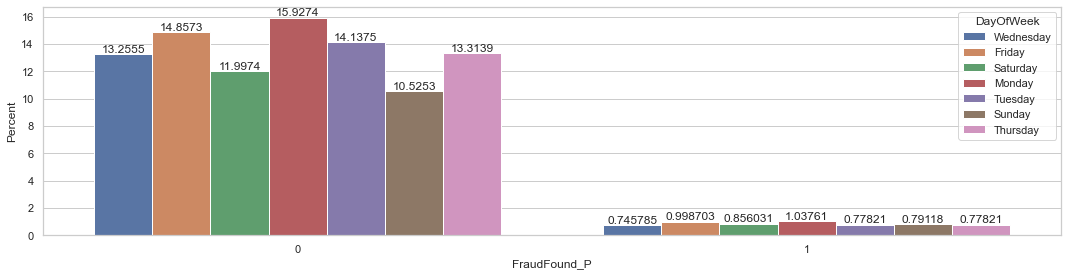

In [36]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=vf,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()



 ####  % of fraudulent transacitons is higher on Monday and Friday. Similarly, the number of claims is also higher for Monday and Friday. Probably due to hurry to go to work on Monday or coming back Friday Evening. But we do not have any time data

## 2.17 Examing the Vehicle category and impact of sex on fraudulent activites

Sex     VehicleCategory
Female  Sedan              0.066387
        Sport              0.010121
        Utility            0.000000
Male    Sedan              0.084951
        Sport              0.016934
        Utility            0.112821
Name: FraudFound_P, dtype: float64
Sex     VehicleCategory
Female  Sedan              0.249045
        Sport              0.100146
        Utility                 NaN
Male    Sedan              0.278826
        Sport              0.129038
        Utility            0.316780
Name: FraudFound_P, dtype: float64


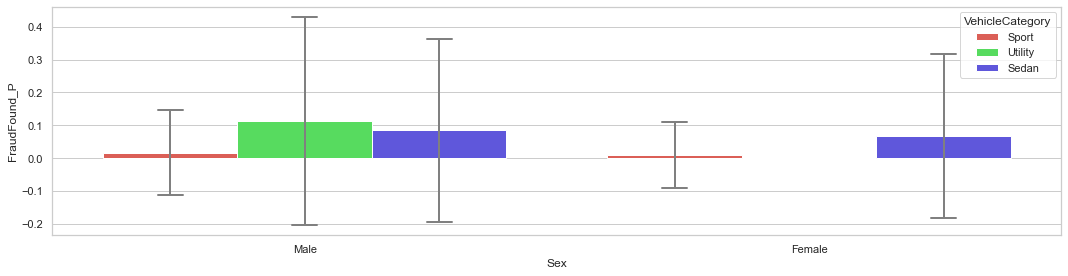

In [37]:

sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = vf,
            palette = 'hls',
            order = ['Male', 'Female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Sex', 'VehicleCategory']).mean()['FraudFound_P'])
print(vf.groupby(['Sex', 'VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()


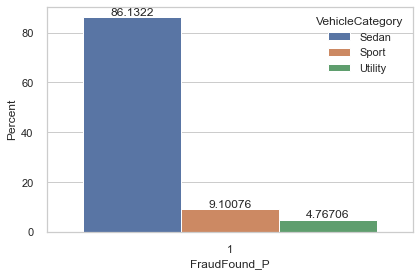

In [36]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf2,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

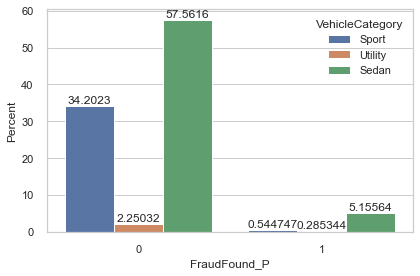

In [37]:
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

VehicleCategory
Sedan      0.082205
Sport      0.015677
Utility    0.112532
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.274690
Sport      0.124236
Utility    0.316425
Name: FraudFound_P, dtype: float64


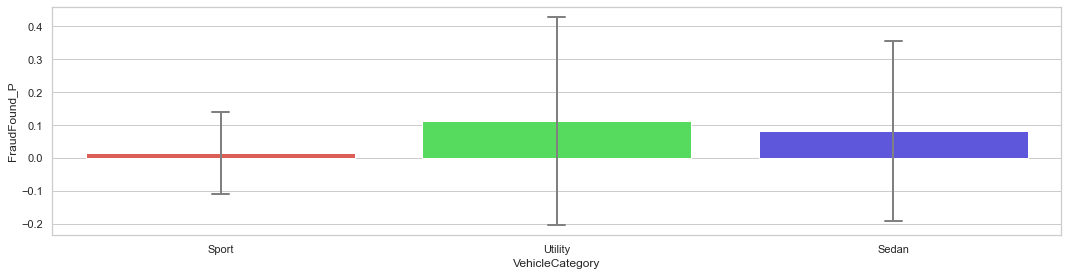

In [39]:

sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'VehicleCategory', y = 'FraudFound_P',  data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['VehicleCategory']).mean()['FraudFound_P'])
print(vf.groupby(['VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

Sex
Female    0.043388
Male      0.062923
Name: FraudFound_P, dtype: float64
Sex
Female    0.203772
Male      0.242834
Name: FraudFound_P, dtype: float64


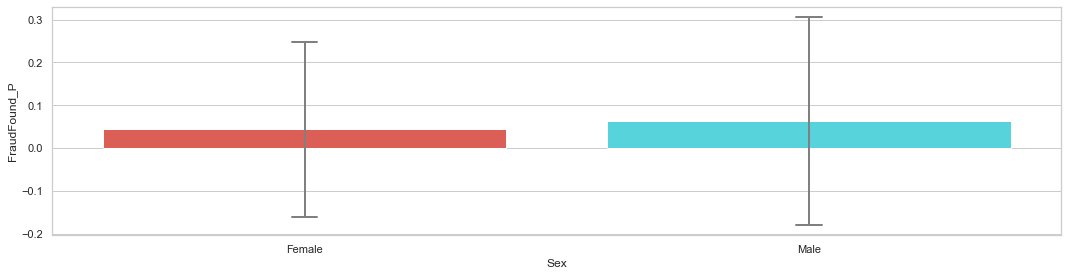

In [40]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P',  data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Sex']).mean()['FraudFound_P'])
print(vf.groupby(['Sex']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

### Few interesting observations:
1.Males driving Utility vehicles have higher probablity of fraud, but it may be due to the fact that most utility vehicles are driven by males

2. Overall, Utility vehicles have higher probablity of fraudulent transactions disproportionately.

3.Sedans have some what similar probablity of frauds for males and females
4. Males on average 

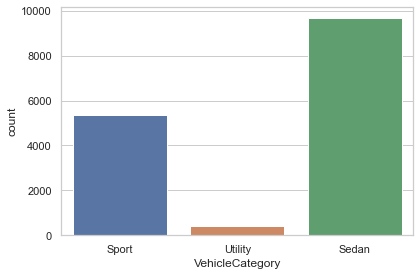

In [41]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax = sns.countplot(x='VehicleCategory', data=vf)
plt.tight_layout()
plt.show()

####  One thing which stands out is , that sports vehicles are less likely to be involved in fraud. Most of the claims are coming from sedans. But they are driven the most also. Utility Vehicle involved in claims have 0.11% probable on an average to have fraudulent claims where as sports vehicles are only 0.02% likely to be involved in false claims
VehicleCategory

Sedan      0.082205

Sport      0.015677

Utility    0.112532

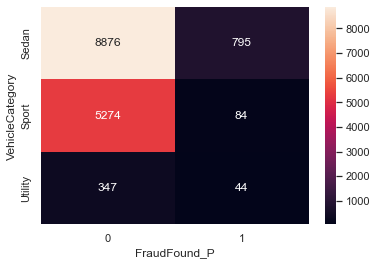

In [42]:
# Group the dataset by Pclass and Survived and then unstack them
group = vf.groupby(['VehicleCategory', 'FraudFound_P'])
vfvcfp = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(vfvcfp, annot = True, fmt ="d")
plt.show()

####  Above correlation matix also indicates utility vehicles have higher expectation of being involved in fraudulent activities

# Pre-Processing and Training Data

## 4.1 Introduction

In this step we will do necessary feature engineering and develop the intial machine learning model

## 4.2 Imports

In [43]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime


## 4.3  Feature Engineering

### 4.3.1 Converting age column into 4 bins

In [44]:
## Converting age column into bins 
vf['age_bins'] = pd.cut(x=vf['Age'], bins=[-1,21,41,61,81], labels=['teens', 'young', 'middle','old'])

Checking the histogram to look at the distribution

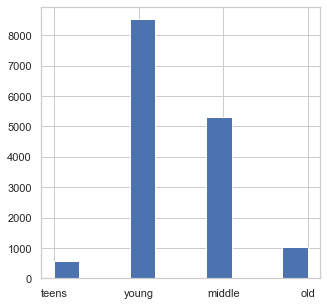

In [45]:
vf.age_bins.hist(figsize=(5,5))
plt.show()

In [46]:
vf.shape

(15420, 34)

## 4.3.2 Making a copy of original data frame


In [51]:
vfm=vf.copy()

In [52]:
vflabel=vf.copy()

In [53]:
vflabel.drop(['PolicyNumber','RepNumber','Age'],axis=1,inplace=True)

In [54]:
vflabel.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins'],
      dtype='object')

Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


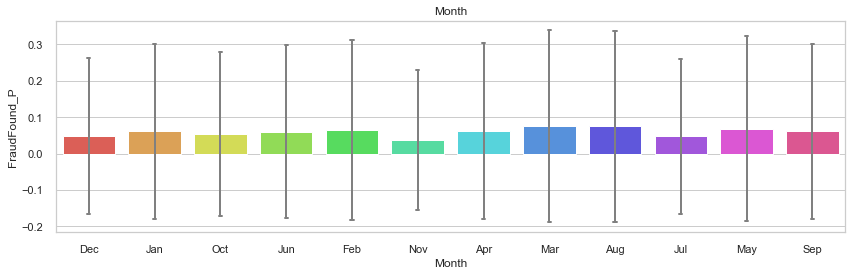

WeekOfMonth
1    0.062755
2    0.063238
3    0.059066
4    0.056504
5    0.055589
Name: FraudFound_P, dtype: float64
WeekOfMonth
1    0.242560
2    0.243424
3    0.235780
4    0.230926
5    0.229197
Name: FraudFound_P, dtype: float64


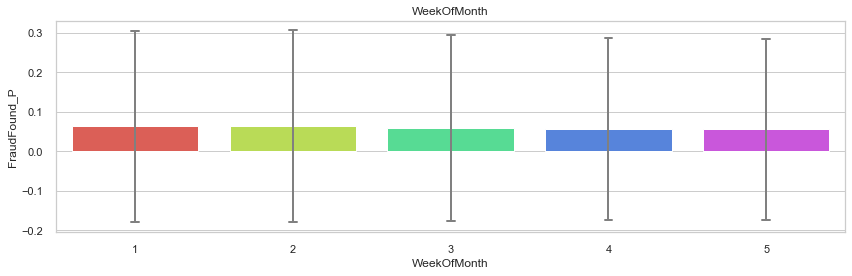

DayOfWeek
Friday       0.062986
Monday       0.061162
Saturday     0.066599
Sunday       0.069914
Thursday     0.055223
Tuesday      0.052174
Wednesday    0.053265
Name: FraudFound_P, dtype: float64
DayOfWeek
Friday       0.242987
Monday       0.239673
Saturday     0.249390
Sunday       0.255075
Thursday     0.228468
Tuesday      0.222426
Wednesday    0.224614
Name: FraudFound_P, dtype: float64


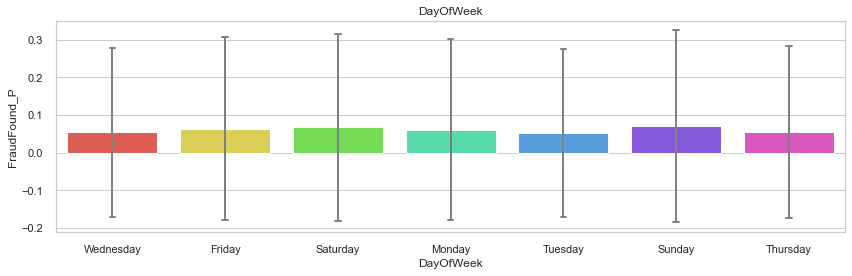

Make
Accura       0.125000
BMW          0.066667
Chevrolet    0.055919
Dodge        0.018349
Ferrari      0.000000
Ford         0.073333
Honda        0.063906
Jaguar       0.000000
Lexus        0.000000
Mazda        0.052251
Mecedes      0.250000
Mercury      0.072289
Nisson       0.033333
Pontiac      0.055512
Porche       0.000000
Saab         0.101852
Saturn       0.103448
Toyota       0.059596
VW           0.028269
Name: FraudFound_P, dtype: float64
Make
Accura       0.331070
BMW          0.258199
Chevrolet    0.229834
Dodge        0.134829
Ferrari      0.000000
Ford         0.260973
Honda        0.244629
Jaguar       0.000000
Lexus             NaN
Mazda        0.222581
Mecedes      0.500000
Mercury      0.260540
Nisson       0.182574
Pontiac      0.229007
Porche       0.000000
Saab         0.303863
Saturn       0.307203
Toyota       0.236775
VW           0.166033
Name: FraudFound_P, dtype: float64


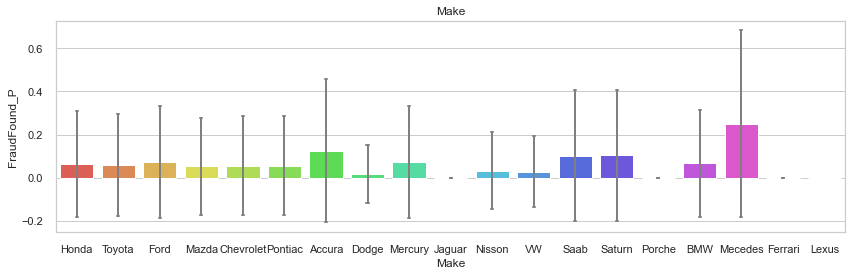

AccidentArea
Rural    0.083229
Urban    0.057155
Name: FraudFound_P, dtype: float64
AccidentArea
Rural    0.276315
Urban    0.232147
Name: FraudFound_P, dtype: float64


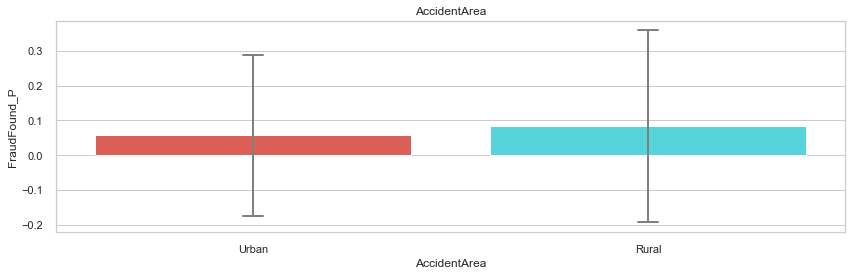

DayOfWeekClaimed
0            0.000000
Friday       0.065679
Monday       0.057493
Saturday     0.078740
Sunday       0.057692
Thursday     0.054135
Tuesday      0.058667
Wednesday    0.063707
Name: FraudFound_P, dtype: float64
DayOfWeekClaimed
0                 NaN
Friday       0.247769
Monday       0.232813
Saturday     0.270399
Sunday       0.235435
Thursday     0.226327
Tuesday      0.235035
Wednesday    0.244272
Name: FraudFound_P, dtype: float64


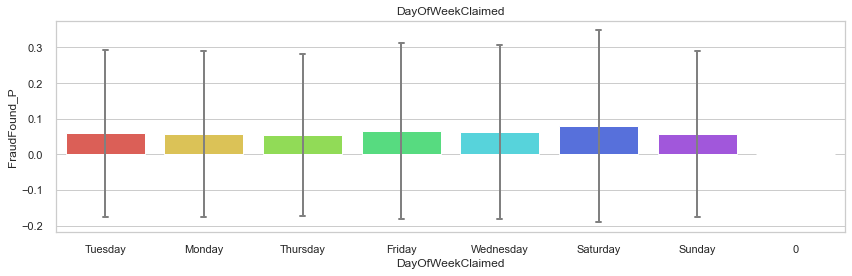

MonthClaimed
0      0.000000
Apr    0.064516
Aug    0.081705
Dec    0.042757
Feb    0.060606
Jan    0.063624
Jul    0.045714
Jun    0.060325
Mar    0.071958
May    0.072289
Nov    0.035798
Oct    0.054518
Sep    0.062802
Name: FraudFound_P, dtype: float64
MonthClaimed
0           NaN
Apr    0.245767
Aug    0.274037
Dec    0.202398
Feb    0.238699
Jan    0.244166
Jul    0.208950
Jun    0.238180
Mar    0.258515
May    0.259058
Nov    0.185858
Oct    0.227122
Sep    0.242704
Name: FraudFound_P, dtype: float64


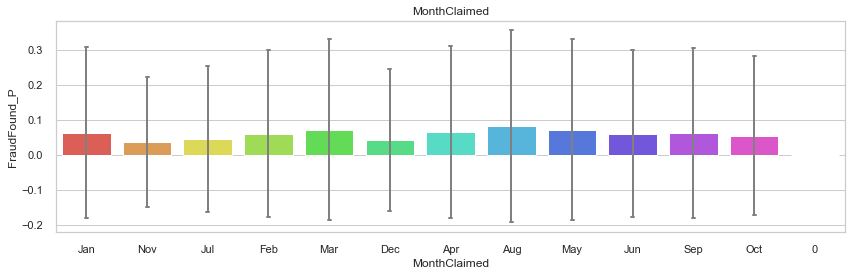

WeekOfMonthClaimed
1    0.063768
2    0.055914
3    0.061680
4    0.060880
5    0.052674
Name: FraudFound_P, dtype: float64
WeekOfMonthClaimed
1    0.244375
2    0.229786
3    0.240607
4    0.239144
5    0.223473
Name: FraudFound_P, dtype: float64


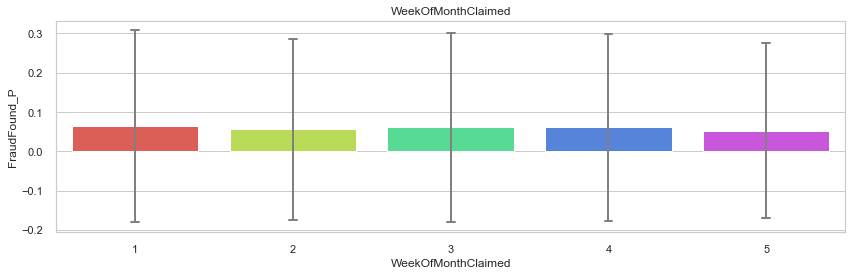

Sex
Female    0.043388
Male      0.062923
Name: FraudFound_P, dtype: float64
Sex
Female    0.203772
Male      0.242834
Name: FraudFound_P, dtype: float64


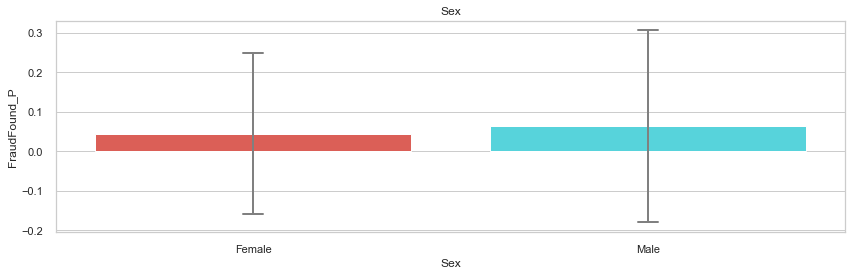

MaritalStatus
Divorced    0.039474
Married     0.060141
Single      0.059351
Widow       0.085714
Name: FraudFound_P, dtype: float64
MaritalStatus
Divorced    0.196013
Married     0.237759
Single      0.236306
Widow       0.284029
Name: FraudFound_P, dtype: float64


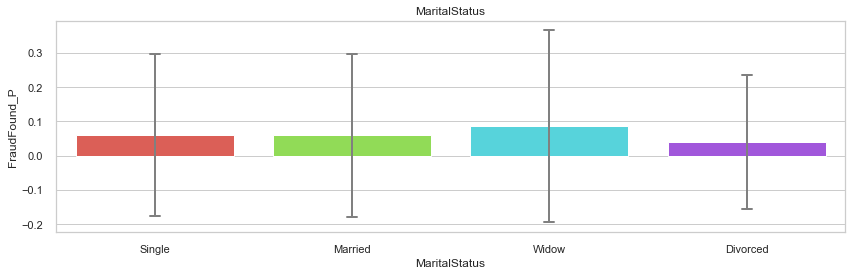

Fault
Policy Holder    0.078896
Third Party      0.008831
Name: FraudFound_P, dtype: float64
Fault
Policy Holder    0.269588
Third Party      0.093566
Name: FraudFound_P, dtype: float64


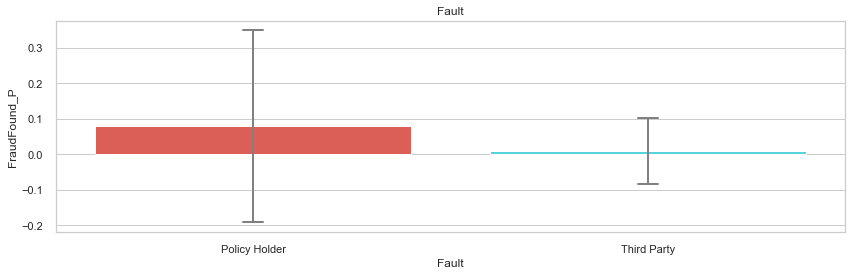

PolicyType
Sedan - All Perils      0.100563
Sedan - Collision       0.068768
Sedan - Liability       0.007219
Sport - All Perils      0.000000
Sport - Collision       0.137931
Sport - Liability       0.000000
Utility - All Perils    0.120588
Utility - Collision     0.100000
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64
PolicyType
Sedan - All Perils      0.300786
Sedan - Collision       0.253082
Sedan - Liability       0.084665
Sport - All Perils      0.000000
Sport - Collision       0.345324
Sport - Liability            NaN
Utility - All Perils    0.326128
Utility - Collision     0.305129
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64


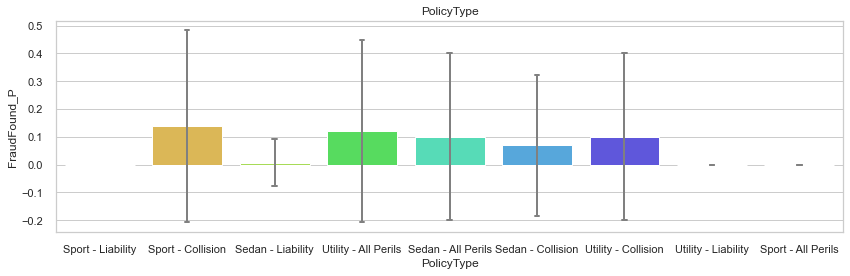

VehicleCategory
Sedan      0.082205
Sport      0.015677
Utility    0.112532
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.274690
Sport      0.124236
Utility    0.316425
Name: FraudFound_P, dtype: float64


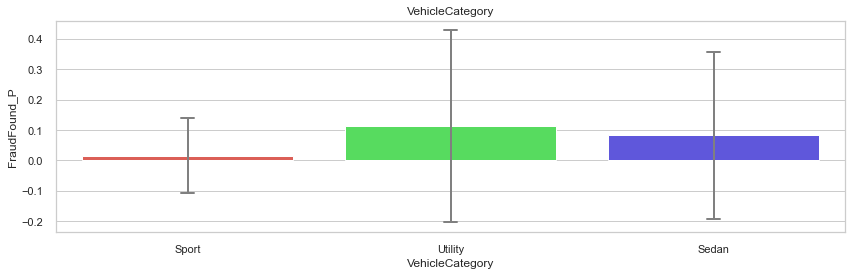

VehiclePrice
20000 to 29000     0.052110
30000 to 39000     0.049533
40000 to 59000     0.067245
60000 to 69000     0.045977
less than 20000    0.093978
more than 69000    0.087338
Name: FraudFound_P, dtype: float64
VehiclePrice
20000 to 29000     0.222263
30000 to 39000     0.217009
40000 to 59000     0.250718
60000 to 69000     0.210649
less than 20000    0.291931
more than 69000    0.282395
Name: FraudFound_P, dtype: float64


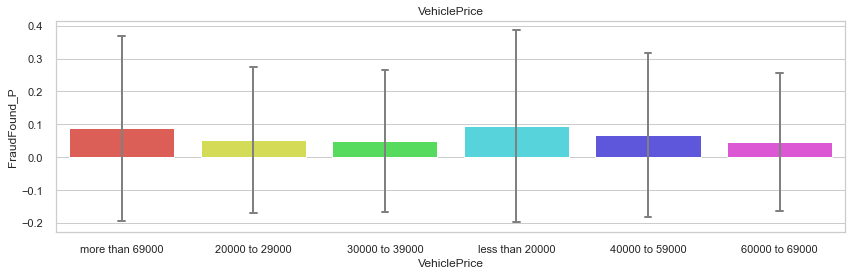

Deductible
300    0.250000
400    0.057690
500    0.178707
700    0.057878
Name: FraudFound_P, dtype: float64
Deductible
300    0.462910
400    0.233164
500    0.383837
700    0.233889
Name: FraudFound_P, dtype: float64


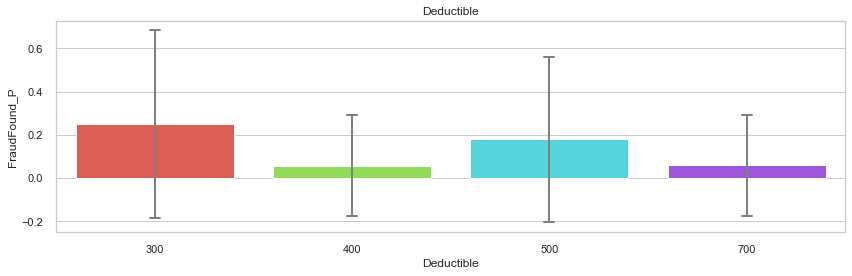

DriverRating
1    0.058824
2    0.056301
3    0.062307
4    0.061989
Name: FraudFound_P, dtype: float64
DriverRating
1    0.235324
2    0.230532
3    0.241743
4    0.241167
Name: FraudFound_P, dtype: float64


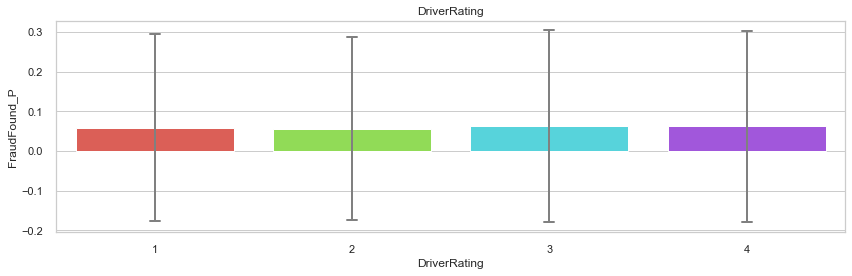

Days_Policy_Accident
1 to 7          0.071429
15 to 30        0.061224
8 to 15         0.090909
more than 30    0.059356
none            0.163636
Name: FraudFound_P, dtype: float64
Days_Policy_Accident
1 to 7          0.267261
15 to 30        0.242226
8 to 15         0.290129
more than 30    0.236297
none            0.373355
Name: FraudFound_P, dtype: float64


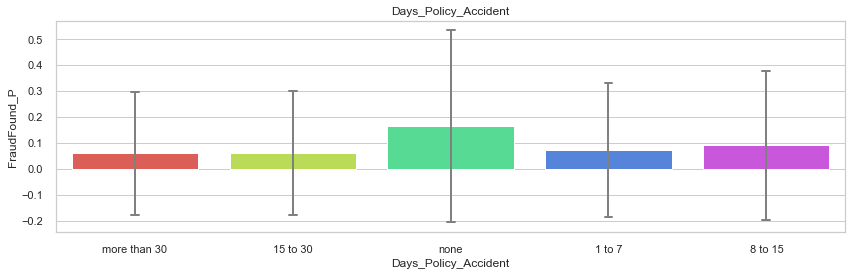

Days_Policy_Claim
15 to 30        0.107143
8 to 15         0.142857
more than 30    0.059575
none            0.000000
Name: FraudFound_P, dtype: float64
Days_Policy_Claim
15 to 30        0.312094
8 to 15         0.358569
more than 30    0.236705
none                 NaN
Name: FraudFound_P, dtype: float64


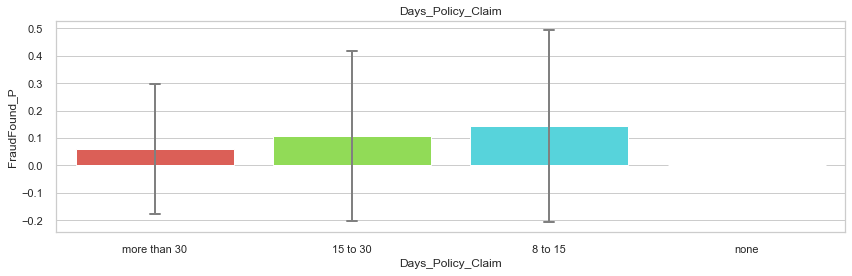

PastNumberOfClaims
1              0.062133
2 to 4         0.053601
more than 4    0.033831
none           0.077895
Name: FraudFound_P, dtype: float64
PastNumberOfClaims
1              0.241430
2 to 4         0.225249
more than 4    0.180839
none           0.268037
Name: FraudFound_P, dtype: float64


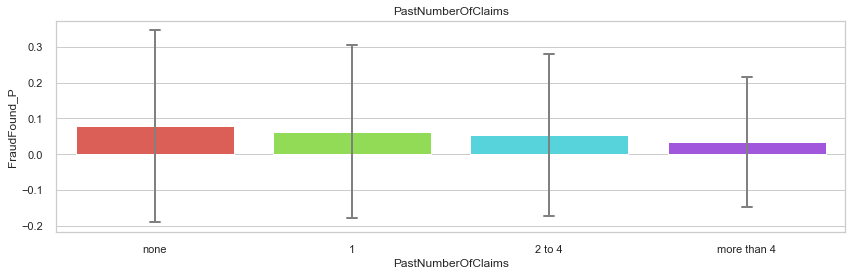

AgeOfVehicle
2 years        0.041096
3 years        0.085526
4 years        0.091703
5 years        0.070007
6 years        0.066125
7 years        0.055967
more than 7    0.051746
new            0.085791
Name: FraudFound_P, dtype: float64
AgeOfVehicle
2 years        0.199886
3 years        0.280588
4 years        0.289239
5 years        0.255254
6 years        0.248537
7 years        0.229878
more than 7    0.221541
new            0.280431
Name: FraudFound_P, dtype: float64


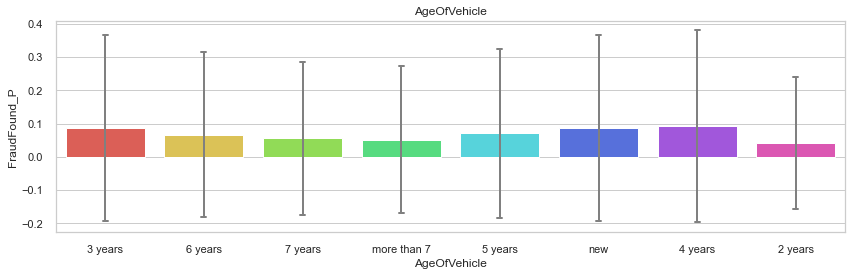

AgeOfPolicyHolder
16 to 17    0.096875
18 to 20    0.133333
21 to 25    0.148148
26 to 30    0.053834
31 to 35    0.064366
36 to 40    0.058620
41 to 50    0.050919
51 to 65    0.050287
over 65     0.059055
Name: FraudFound_P, dtype: float64
AgeOfPolicyHolder
16 to 17    0.296251
18 to 20    0.351866
21 to 25    0.356903
26 to 30    0.225873
31 to 35    0.245426
36 to 40    0.234941
41 to 50    0.219872
51 to 65    0.218616
over 65     0.235960
Name: FraudFound_P, dtype: float64


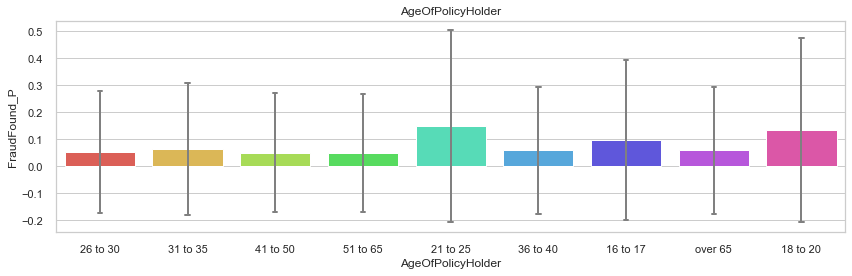

PoliceReportFiled
No     0.060499
Yes    0.037383
Name: FraudFound_P, dtype: float64
PoliceReportFiled
No     0.238417
Yes    0.189921
Name: FraudFound_P, dtype: float64


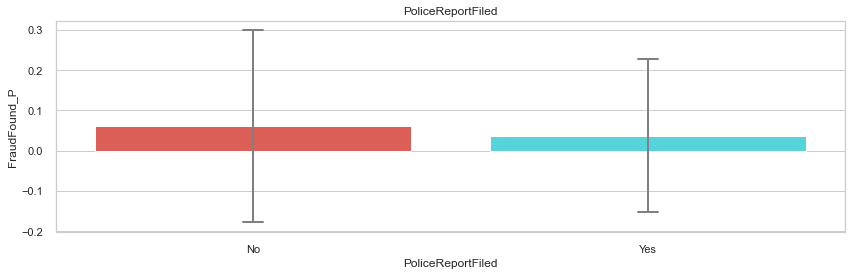

WitnessPresent
No     0.060001
Yes    0.034483
Name: FraudFound_P, dtype: float64
WitnessPresent
No     0.237497
Yes    0.183523
Name: FraudFound_P, dtype: float64


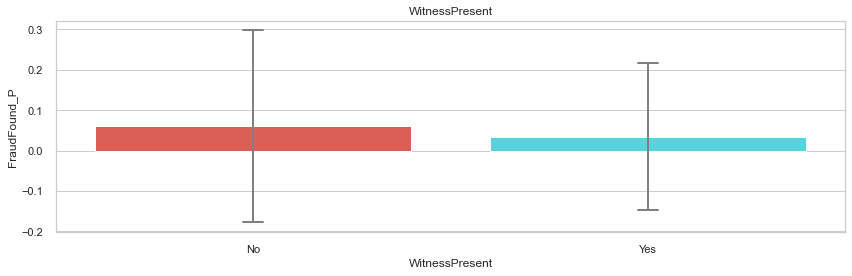

AgentType
External    0.060544
Internal    0.016598
Name: FraudFound_P, dtype: float64
AgentType
External    0.238500
Internal    0.128024
Name: FraudFound_P, dtype: float64


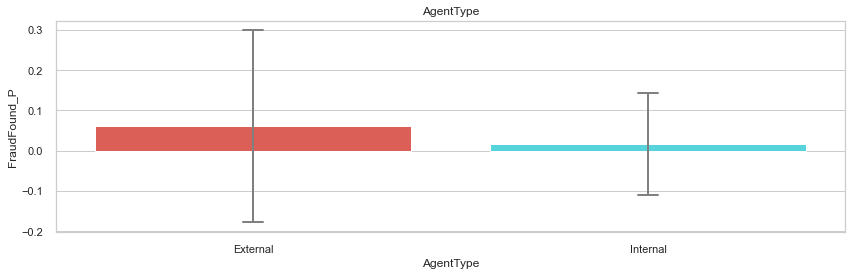

NumberOfSuppliments
1 to 2         0.063881
3 to 5         0.048091
more than 5    0.050427
none           0.066979
Name: FraudFound_P, dtype: float64
NumberOfSuppliments
1 to 2         0.244590
3 to 5         0.214012
more than 5    0.218852
none           0.250003
Name: FraudFound_P, dtype: float64


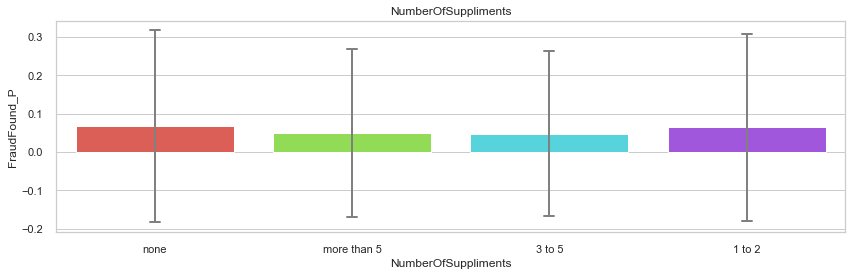

AddressChange_Claim
1 year            0.064706
2 to 3 years      0.175258
4 to 8 years      0.052298
no change         0.057596
under 6 months    0.750000
Name: FraudFound_P, dtype: float64
AddressChange_Claim
1 year            0.246733
2 to 3 years      0.380842
4 to 8 years      0.222804
no change         0.232985
under 6 months    0.500000
Name: FraudFound_P, dtype: float64


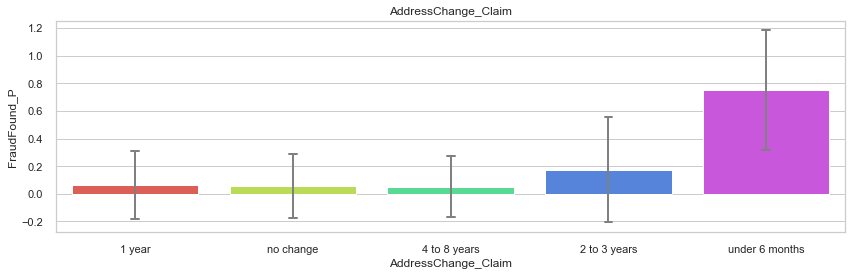

NumberOfCars
1 vehicle      0.059374
2 vehicles     0.060649
3 to 4         0.077957
5 to 8         0.047619
more than 8    0.000000
Name: FraudFound_P, dtype: float64
NumberOfCars
1 vehicle      0.236332
2 vehicles     0.238853
3 to 4         0.268465
5 to 8         0.218218
more than 8    0.000000
Name: FraudFound_P, dtype: float64


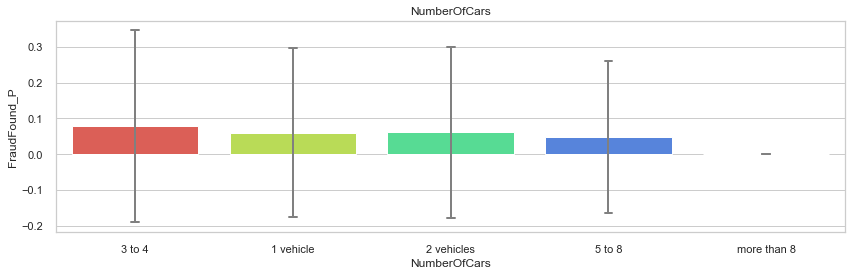

Year
1994    0.066591
1995    0.057940
1996    0.052168
Name: FraudFound_P, dtype: float64
Year
1994    0.249332
1995    0.233653
1996    0.222392
Name: FraudFound_P, dtype: float64


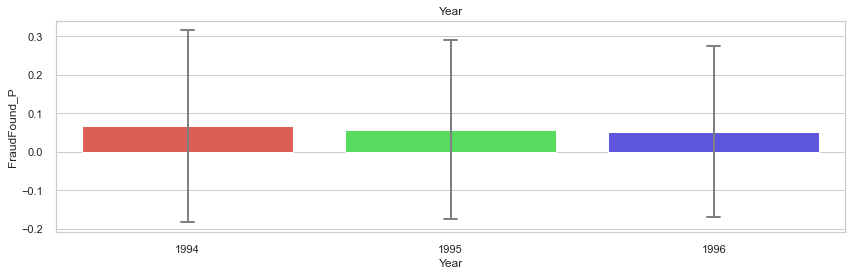

BasePolicy
All Perils    0.101596
Collision     0.072962
Liability     0.007187
Name: FraudFound_P, dtype: float64
BasePolicy
All Perils    0.302150
Collision     0.260096
Liability     0.084480
Name: FraudFound_P, dtype: float64


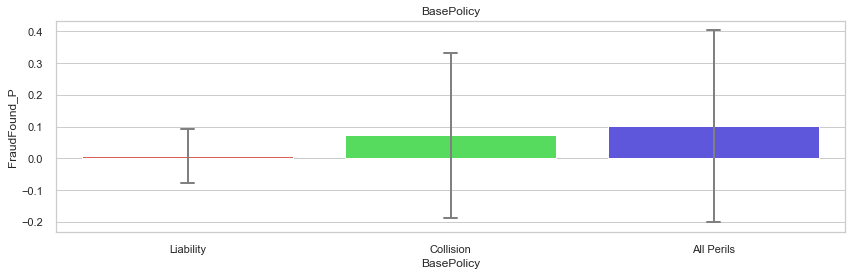

age_bins
teens     0.092982
young     0.064202
middle    0.050255
old       0.054966
Name: FraudFound_P, dtype: float64
age_bins
teens     0.290663
young     0.245127
middle    0.218491
old       0.228024
Name: FraudFound_P, dtype: float64


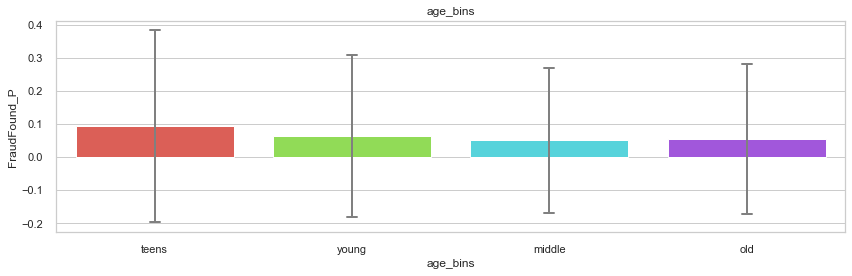

In [86]:
for i in ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']:
    sns.set(style="whitegrid") 
    plt.figure(figsize=(12,4))
    ax=sns.barplot(x = i, y = 'FraudFound_P',  data = vflabel,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            ).set(title=i)

    print(vf.groupby([i]).mean()['FraudFound_P'])
    print(vf.groupby([i]).std()['FraudFound_P'])
    plt.tight_layout()
    plt.show()

In [58]:
!pip install category_encoders

In [59]:
import category_encoders as ce

In [60]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

In [61]:
enc = ce.TargetEncoder(cols=cols)

C:\Users\vrastogi\Anaconda3\envs\Pycaret37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\vrastogi\Anaconda3\envs\Pycaret37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [62]:
#Peform the train test split 
X_trl, X_tel, y_trl, y_tel = train_test_split(vflabel.drop(columns='FraudFound_P'), 
                                                    vflabel.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vflabel.FraudFound_P)

In [63]:
lab_train = enc.fit_transform(X_trl, y_trl)
lab_test=enc.transform(X_tel)

In [64]:
lab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12336 entries, 1010 to 3219
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 12336 non-null  float64
 1   WeekOfMonth           12336 non-null  float64
 2   DayOfWeek             12336 non-null  float64
 3   Make                  12336 non-null  float64
 4   AccidentArea          12336 non-null  float64
 5   DayOfWeekClaimed      12336 non-null  float64
 6   MonthClaimed          12336 non-null  float64
 7   WeekOfMonthClaimed    12336 non-null  float64
 8   Sex                   12336 non-null  float64
 9   MaritalStatus         12336 non-null  float64
 10  Fault                 12336 non-null  float64
 11  PolicyType            12336 non-null  float64
 12  VehicleCategory       12336 non-null  float64
 13  VehiclePrice          12336 non-null  float64
 14  Deductible            12336 non-null  float64
 15  DriverRating     

In [65]:
lab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 14424 to 13338
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 3084 non-null   float64
 1   WeekOfMonth           3084 non-null   float64
 2   DayOfWeek             3084 non-null   float64
 3   Make                  3084 non-null   float64
 4   AccidentArea          3084 non-null   float64
 5   DayOfWeekClaimed      3084 non-null   float64
 6   MonthClaimed          3084 non-null   float64
 7   WeekOfMonthClaimed    3084 non-null   float64
 8   Sex                   3084 non-null   float64
 9   MaritalStatus         3084 non-null   float64
 10  Fault                 3084 non-null   float64
 11  PolicyType            3084 non-null   float64
 12  VehicleCategory       3084 non-null   float64
 13  VehiclePrice          3084 non-null   float64
 14  Deductible            3084 non-null   float64
 15  DriverRating    

In [66]:
lab_traindf=pd.concat([lab_train,y_trl],axis='columns')
lab_testdf=pd.concat([lab_test,y_tel],axis='columns')
lab_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,0.048924,0.070780,0.074661,0.070780,0.059629
WeekOfMonth,0.059866,0.055094,0.059866,0.059866,0.057064
DayOfWeek,0.070664,0.064614,0.062681,0.064614,0.053916
Make,0.063669,0.057018,0.132597,0.053402,0.056928
AccidentArea,0.057073,0.057073,0.057073,0.057073,0.083594
DayOfWeekClaimed,0.057944,0.063532,0.068307,0.063532,0.063532
MonthClaimed,0.043908,0.057900,0.081264,0.070320,0.077876
WeekOfMonthClaimed,0.064304,0.057325,0.055276,0.059437,0.064304
Sex,0.041841,0.063124,0.063124,0.063124,0.063124
MaritalStatus,0.060319,0.060319,0.060319,0.058529,0.058529


In [ ]:
from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =False,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

In [74]:

from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,
            feature_selection=True,feature_selection_threshold=0.3,
            ignore_low_variance =False,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [75]:
setup_label = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9406,0.8099,0.0610,0.5391,0.1090,0.0980,0.1656,0.6180
lightgbm,Light Gradient Boosting Machine,0.9406,0.8225,0.0712,0.5642,0.1252,0.1126,0.1825,0.0940
gbc,Gradient Boosting Classifier,0.9404,0.8198,0.0373,0.6069,0.0688,0.0616,0.1327,0.8700
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
et,Extra Trees Classifier,0.9370,0.8089,0.0678,0.3479,0.1123,0.0954,0.1310,0.4780
ada,Ada Boost Classifier,0.9058,0.7851,0.1627,0.1833,0.1708,0.1215,0.1224,0.2370
dt,Decision Tree Classifier,0.8824,0.5621,0.1983,0.1457,0.1677,0.1061,0.1077,0.0410
nb,Naive Bayes,0.8724,0.8080,0.3237,0.1818,0.2313,0.1680,0.1772,0.0170
qda,Quadratic Discriminant Analysis,0.8282,0.8051,0.4559,0.1655,0.2402,0.1678,0.1966,0.0170
knn,K Neighbors Classifier,0.7997,0.7180,0.5051,0.1512,0.2326,0.1547,0.1921,0.2930


In [82]:
label_gbc = create_model('gbc',fold=10)
tuned_label_gbc=tune_model(label_gbc,optimize='F1',fold=10)
print(tuned_label_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8156,0.8103,0.4576,0.1525,0.2288,0.1529,0.1829
1,0.7994,0.8424,0.6102,0.1706,0.2667,0.1911,0.2438
2,0.8116,0.7847,0.4237,0.1412,0.2119,0.1342,0.1606
3,0.7923,0.8146,0.5254,0.1490,0.2322,0.1534,0.1946
4,0.8024,0.8247,0.5932,0.1699,0.2642,0.1888,0.2386
5,0.7933,0.8182,0.4746,0.1393,0.2154,0.1355,0.1696
6,0.8207,0.8382,0.6780,0.2020,0.3113,0.2414,0.3006
7,0.7903,0.7896,0.5763,0.1574,0.2473,0.1693,0.2180
8,0.7809,0.7622,0.5085,0.1382,0.2174,0.1361,0.1756


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.01, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1122, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [83]:
pred_label_gbc=predict_model(tuned_label_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9388,0.6577,0.0473,0.4118,0.0848,0.0734,0.1234


In [84]:
pred_label_gbc=predict_model(tuned_label_gbc,data=lab_testdf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9371,0.6646,0.0270,0.2632,0.0490,0.0383,0.0674


In [81]:
vflabel.to_csv('C:/Users/vrastogi/GitHubFiles/Vehicle Fraud Capstone/vflabel.csv')

### 4.3.3 Earlier we noticed that MonthClaimed had 13 values, which cannot be true

In [46]:
item_month_claimed = vf['MonthClaimed'].value_counts(normalize=True)
print(item_month_claimed)

Jan    0.093774
May    0.091505
Mar    0.087419
Oct    0.086835
Jun    0.083852
Feb    0.083463
Nov    0.083333
Apr    0.082425
Sep    0.080545
Jul    0.079442
Dec    0.074319
Aug    0.073022
0      0.000065
Name: MonthClaimed, dtype: float64


In [47]:
item_month_claimed1 = vf['MonthClaimed'].value_counts()
print(item_month_claimed1)

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64


***We have one entry with month 0, but it may not impact our results***

***We can impute or drop that row***


### 4.3.4 Dropping columns which are not useful

We are dropping columns like PolicyNumber,RepNumber,Age

In [48]:
vfm.drop(['PolicyNumber','RepNumber','Age'],axis=1,inplace=True)

### 4.3.4 Checking the info about  features in new data frame

In [49]:
vfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  object  
 1   WeekOfMonth           15420 non-null  int64   
 2   DayOfWeek             15420 non-null  object  
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  object  
 6   MonthClaimed          15420 non-null  object  
 7   WeekOfMonthClaimed    15420 non-null  int64   
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Fault                 15420 non-null  object  
 11  PolicyType            15420 non-null  object  
 12  VehicleCategory       15420 non-null  object  
 13  VehiclePrice          15420 non-null  object  
 14  FraudFound_P          15420 non-null  int64   
 15  De

## 4.4.1  Premodeling using PyCaret Package 
Need to create pycaret environment : Creates issues in Python 3.9 version so downloaded Python 3.8

In [50]:
! pip install imbalanced-learn

### 4.4.2 Checking the list of columns in the new dataframe

In [51]:
vfm.columns


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins'],
      dtype='object')

### 4.4.3 Creating the dummy variables for all columns as they are all categorical 

In [52]:
vfm_dummies=pd.get_dummies(vfm[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice','Deductible','FraudFound_P', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']],drop_first=True)

***Making a list of dummy features***

In [53]:
## making a list of dummy features to ensure the process is done properly
vfm_dummies.columns.to_list()

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Deductible',
 'FraudFound_P',
 'DriverRating',
 'Year',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'AccidentArea_Urban',
 'DayOfWeekClaimed_Friday',
 'DayOfWeekClaimed_Monday',
 'DayOfWeekClaimed_Saturday',
 'DayOfWeekClaimed_Sunday',
 'DayOfWeekClaimed_Thursday',
 'DayOfWeekClaimed_Tuesday',
 'DayOfWeekClaimed_Wednesday',
 'MonthClaimed_Apr',
 'MonthClaimed_Aug',
 'MonthClaimed_Dec',
 'MonthClaimed_Feb',
 'MonthClaimed_Jan',
 'M

***We can see that 'WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year' are still there and they are not converted to dummies***

***Converting these features to categories***

In [54]:
## Converting the columns to categories 
for col in ['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year']:
    vfm_dummies[col] = vfm_dummies[col].astype('category')

***Creating dummy features for these categorical features now***

In [55]:
### Creating dummy features
vfm_dummies1=pd.get_dummies(vfm_dummies[['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year']],drop_first=True)

***Checking to see the list of these dummy features***

In [56]:
vfm_dummies1.columns.to_list()

['WeekOfMonth_2',
 'WeekOfMonth_3',
 'WeekOfMonth_4',
 'WeekOfMonth_5',
 'WeekOfMonthClaimed_2',
 'WeekOfMonthClaimed_3',
 'WeekOfMonthClaimed_4',
 'WeekOfMonthClaimed_5',
 'Deductible_400',
 'Deductible_500',
 'Deductible_700',
 'DriverRating_2',
 'DriverRating_3',
 'DriverRating_4',
 'Year_1995',
 'Year_1996']

***Making a new dataframe with all dummy features***

In [57]:
### Merging the dataframe with new dummy features with old one
vfmerged=pd.concat([vfm_dummies,vfm_dummies1],axis='columns')

***Dropping original features as we do not need them***

In [58]:
### Dropping the original features so only dummy features are in the dataframe
vfmerged.drop(['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year'],axis=1, inplace=True)

***Checking to see if all dummy features are there as we anticipated***

In [59]:
vfmerged.columns.to_list()

['FraudFound_P',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'AccidentArea_Urban',
 'DayOfWeekClaimed_Friday',
 'DayOfWeekClaimed_Monday',
 'DayOfWeekClaimed_Saturday',
 'DayOfWeekClaimed_Sunday',
 'DayOfWeekClaimed_Thursday',
 'DayOfWeekClaimed_Tuesday',
 'DayOfWeekClaimed_Wednesday',
 'MonthClaimed_Apr',
 'MonthClaimed_Aug',
 'MonthClaimed_Dec',
 'MonthClaimed_Feb',
 'MonthClaimed_Jan',
 'MonthClaimed_Jul',
 'MonthClaimed_Jun',
 'MonthClaimed_Mar',
 'MonthClaimed_May',

In [60]:
vfmerged.shape

(15420, 136)

***New DataFrame has 136 features***

###  4.4.4  Splitting the data into train and test

In [61]:
#Peform the train test split 
X_train, X_test, y_train, y_test = train_test_split(vfmerged.drop(columns='FraudFound_P'), 
                                                    vfmerged.FraudFound_P, test_size=0.1, 
                                                    random_state=47,stratify=vfmerged.FraudFound_P)

In [62]:
### checking the shape after train, test split
print(f"train data shape:{X_train.shape}")
print(f"Test data shape:{X_test.shape}")


train data shape:(13878, 135)
Test data shape:(1542, 135)


In [63]:
### checking the shape after train, test split
print(f"train target shape:{y_train.shape}")
print(f"Test target shape:{y_test.shape}")


train target shape:(13878,)
Test target shape:(1542,)


### 4.4.5 Balancing the target  class using different approaches

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques

Random Under-Sampling
Random Over-Sampling
SMOTE - Synthetic Minority Oversampling Technique
ADASYN - Adaptive Synthetic Sampling Method
SMOTETomek - Over-sampling followed by under-sampling
Unddersampling tends to loss of data so we will not use that. We will go with Random Over-Sampling, SMOTE - Synthetic Minority Oversampling Technique, ADASYN - Adaptive Synthetic Sampling Method and see which technique works better.

###  4.4.5.1 Installing and importing necessary libraries

In [64]:
! pip install imbalanced-learn

In [65]:
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#### 4.4.5.1 Creating 4 different training dataset with different sampling techniques

In [66]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## SMOTE OVER SAMPLING
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_sm, y_resampled_sm = smt.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_sm)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_sm).items())}")                        
                            


Total length of len:26094
New Distribution of out target label:[(0, 13047), (1, 13047)]


In [67]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## Random Over Sampling
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_ro, y_resampled_ro = over_sample.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_ro)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_ro).items())}")

Total length of len:26094
New Distribution of out target label:[(0, 13047), (1, 13047)]


***Important to remember sampling strategy=1.0 makes equal number of data points for both classes***


***sampling strategy=0.5 had majority class= 2* minority class***

In [68]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ad, y_resampled_ad = ada.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_ad)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_ad).items())}")

Total length of len:26135
New Distribution of out target label:[(0, 13047), (1, 13088)]


In [69]:
### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
under = RandomUnderSampler(sampling_strategy=1.0)
X_resampled_u, y_resampled_u = under.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_u)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_u).items())}")

Total length of len:1662
New Distribution of out target label:[(0, 831), (1, 831)]


In [70]:
### Dataframe for smote
smote=pd.concat([X_resampled_sm, y_resampled_sm],axis=1)
smote.shape

(26094, 136)

In [71]:
### Dataframe for Random Over Sampling
os=pd.concat([X_resampled_ro, y_resampled_ro],axis=1)
os.shape

(26094, 136)

In [72]:
Adasyn=pd.concat([X_resampled_ad, y_resampled_ad],axis=1)
Adasyn.shape

(26135, 136)

In [73]:
un=pd.concat([X_resampled_u, y_resampled_u],axis=1)
un.shape

(1662, 136)

###  Running pycaret models for the classification for 4 different resampled train sets

In [77]:
from pycaret.classification import *
sm = setup(smote, target = 'FraudFound_P',data_split_stratify=True,session_id=1122)
smote_best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9687,0.9882,0.9379,0.9995,0.9677,0.9375,0.9393,0.7420
et,Extra Trees Classifier,0.9680,0.9880,0.9374,0.9986,0.9670,0.9361,0.9378,1.5120
lightgbm,Light Gradient Boosting Machine,0.9669,0.9896,0.9346,0.9991,0.9658,0.9338,0.9357,0.2640
lr,Logistic Regression,0.9649,0.9840,0.9309,0.9987,0.9636,0.9297,0.9319,0.4700
gbc,Gradient Boosting Classifier,0.9640,0.9869,0.9284,0.9995,0.9626,0.9279,0.9303,1.3420
qda,Quadratic Discriminant Analysis,0.9630,0.9658,0.9330,0.9927,0.9619,0.9261,0.9278,0.1620
ada,Ada Boost Classifier,0.9625,0.9854,0.9307,0.9939,0.9613,0.9250,0.9269,0.5580
nb,Naive Bayes,0.9598,0.9655,0.9227,0.9966,0.9582,0.9195,0.9221,0.0640
knn,K Neighbors Classifier,0.9523,0.9719,0.9105,0.9934,0.9502,0.9045,0.9077,5.7540
svm,SVM - Linear Kernel,0.9494,0.0000,0.9352,0.9625,0.9486,0.8987,0.8991,0.9080


In [78]:
### Random Forest Classifier gave best prediction. Use it for hyper parameter tuning
smote_rf = create_model('rf',fold=5)
tuned_smote_rf=tune_model(smote_rf,optimize='Precision',fold=5)
print(tuned_smote_rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9611,0.9850,0.9222,1.0000,0.9595,0.9223,0.9251
1,0.9581,0.9841,0.9162,1.0000,0.9563,0.9162,0.9195
2,0.9609,0.9846,0.9217,1.0000,0.9592,0.9217,0.9245
3,0.9559,0.9837,0.9119,1.0000,0.9539,0.9119,0.9154
4,0.9546,0.9812,0.9091,1.0000,0.9524,0.9091,0.9129
Mean,0.9581,0.9837,0.9162,1.0000,0.9563,0.9162,0.9195
Std,0.0026,0.0013,0.0052,0.0000,0.0028,0.0052,0.0048


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=160, n_jobs=-1, oob_score=False,
                       random_state=1122, verbose=0, warm_start=False)


In [79]:
pred_smote_rf=predict_model(tuned_smote_rf)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9599,0.9828,0.9198,1.0000,0.9582,0.9198,0.9228


### Testing the model on unseen data we hold out earlier

In [80]:
Test=pd.concat([X_test,y_test],axis=1)
Test.shape

(1542, 136)

In [81]:
predsmoterf=predict_model(tuned_smote_rf, data=Test)
print(predsmoterf.head(1))
#from pycaret.utils import check_metric
#check_metric(predsmoterf['default'], predsmoterf['Label'], metric = 'Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9403,0.7421,0.0000,0.0000,0.0000,0.0000,0.0000


      Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
2141          0          0          0          0          0          0   

      Month_Mar  Month_May  Month_Nov  Month_Oct  ...  Deductible_500  \
2141          1          0          0          0  ...               0   

      Deductible_700  DriverRating_2  DriverRating_3  DriverRating_4  \
2141               0               1               0               0   

      Year_1995  Year_1996  FraudFound_P  Label   Score  
2141          0          0             1      0  0.5941  

[1 rows x 138 columns]


***This model did not generalize well on unseen data***

### Taking different approach:
1. May be number of features are too high.
2. May use label encoding 
3. We can do bivariate analyis and see if we need to remove some features

In [82]:
vfmnew=vfm.copy()

In [83]:
newlist=vfmnew.columns.to_list()
print(newlist)

['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'age_bins']


In [84]:
vfmnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  object  
 1   WeekOfMonth           15420 non-null  int64   
 2   DayOfWeek             15420 non-null  object  
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  object  
 6   MonthClaimed          15420 non-null  object  
 7   WeekOfMonthClaimed    15420 non-null  int64   
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Fault                 15420 non-null  object  
 11  PolicyType            15420 non-null  object  
 12  VehicleCategory       15420 non-null  object  
 13  VehiclePrice          15420 non-null  object  
 14  FraudFound_P          15420 non-null  int64   
 15  De

In [85]:
#Peform the train test split 
#Peform the train test split 
X_tr, X_te, y_tr, y_te = train_test_split(vfmnew.drop(columns='FraudFound_P'), 
                                                    vfmnew.FraudFound_P, test_size=0.1, 
                                                    random_state=47,stratify=vfmnew.FraudFound_P)


In [101]:
### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
under = RandomUnderSampler(sampling_strategy=1.0)
X_resampled_u, y_resampled_u = under.fit_resample(X_tr, y_tr)
print(f"Total length of len:{len(X_resampled_u)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_u).items())}")

Total length of len:1662
New Distribution of out target label:[(0, 831), (1, 831)]


In [102]:
## New DataFrame with undersampling
USSeen=pd.concat([X_resampled_u, y_resampled_u],axis=1)
print(USSeen.shape)
USUnseen=pd.concat([X_te, y_te],axis=1)
print(USUnseen.shape)

(1662, 31)
(1542, 31)


In [103]:
setup2 = setup(USSeen, target = 'FraudFound_P',
            fold=5,train_size=0.8,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance = True,data_split_stratify=True,
            high_cardinality_features=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
                                  'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                                  'VehiclePrice','Deductible', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
                                  'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
                                  'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 
                                  'Year', 'BasePolicy', 'age_bins'],session_id=1122)
          
setup1_bestp = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7532,0.0000,0.9172,0.6913,0.7879,0.5065,0.5374,0.0060
lda,Linear Discriminant Analysis,0.7532,0.7783,0.9172,0.6913,0.7879,0.5065,0.5374,0.0120
lr,Logistic Regression,0.7509,0.7773,0.8976,0.6946,0.7827,0.5020,0.5263,0.7780
qda,Quadratic Discriminant Analysis,0.7419,0.7709,0.8645,0.6950,0.7699,0.4839,0.5005,0.0060
rf,Random Forest Classifier,0.7404,0.7907,0.8480,0.6983,0.7655,0.4809,0.4933,0.2100
et,Extra Trees Classifier,0.7366,0.7832,0.8284,0.7019,0.7586,0.4734,0.4839,0.2020
gbc,Gradient Boosting Classifier,0.7351,0.7740,0.8494,0.6918,0.7623,0.4704,0.4834,0.0600
ada,Ada Boost Classifier,0.7314,0.7559,0.8419,0.6900,0.7580,0.4628,0.4753,0.0340
nb,Naive Bayes,0.7291,0.7657,0.8419,0.6874,0.7561,0.4584,0.4721,0.0060
lightgbm,Light Gradient Boosting Machine,0.7201,0.7635,0.7802,0.6991,0.7359,0.4403,0.4455,0.0200


In [114]:
setup2_lda = create_model('lda',fold=10)
#tuned_lda=tune_model(setup2_lda,optimize='F1',fold=10,choose_better=True)
#print(tuned_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9397,0.7954,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9388,0.7880,0.0000,0.0000,0.0000,-0.0018,-0.0076
2,0.9405,0.7359,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9387,0.7514,0.0000,0.0000,0.0000,-0.0035,-0.0107
4,0.9387,0.8043,0.0000,0.0000,0.0000,-0.0035,-0.0107
5,0.9396,0.7736,0.0000,0.0000,0.0000,-0.0018,-0.0076
6,0.9414,0.7949,0.0152,1.0000,0.0299,0.0281,0.1194
7,0.9387,0.7928,0.0000,0.0000,0.0000,-0.0018,-0.0076
8,0.9396,0.7942,0.0000,0.0000,0.0000,0.0000,0.0000


In [115]:
setup1 = setup(Seen, target = 'FraudFound_P',
            fold=5,train_size=0.8,fold_shuffle=True,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance = True,data_split_stratify=True,
            high_cardinality_features=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
                                  'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                                  'VehiclePrice','Deductible', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
                                  'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
                                  'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 
                                  'Year', 'BasePolicy', 'age_bins'],session_id=1122)
          
setup1_bestp = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9403,0.7830,0.0120,0.6833,0.0236,0.0211,0.0820,0.3360
lr,Logistic Regression,0.9401,0.7795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820
ridge,Ridge Classifier,0.9401,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.9401,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.9399,0.7883,0.0000,0.0000,0.0000,-0.0004,-0.0021,0.0880
gbc,Gradient Boosting Classifier,0.9398,0.8038,0.0030,0.2667,0.0059,0.0047,0.0221,0.2380
lda,Linear Discriminant Analysis,0.9397,0.7827,0.0030,0.1500,0.0059,0.0045,0.0158,0.0160
et,Extra Trees Classifier,0.9397,0.7787,0.0211,0.4367,0.0400,0.0347,0.0843,0.3380
lightgbm,Light Gradient Boosting Machine,0.9381,0.7991,0.0180,0.2565,0.0333,0.0259,0.0526,0.0540
knn,K Neighbors Classifier,0.9352,0.6294,0.0361,0.2291,0.0622,0.0471,0.0698,0.1740


In [116]:
Seen=pd.concat([X_tr, y_tr],axis=1)
print(Seen.shape)
Unseen=pd.concat([X_te, y_te],axis=1)
print(Unseen.shape)

(13878, 31)
(1542, 31)


In [87]:
categorical_features=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
                                  'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                                  'VehiclePrice','Deductible', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
                                  'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
                                  'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 
                                  'Year', 'BasePolicy', 'age_bins']
remove_multicollinearity = True,combine_rare_levels=True,

SyntaxError: can't assign to keyword (1439845.py, line 9)

In [108]:
setup1 = setup(Seen, target = 'FraudFound_P',
            fold=5,train_size=0.8,fold_shuffle=True,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance = True,data_split_stratify=True,
            high_cardinality_features=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
                                  'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                                  'VehiclePrice','Deductible', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
                                  'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
                                  'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 
                                  'Year', 'BasePolicy', 'age_bins'],session_id=1122)
          
setup1_bestp = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9403,0.7830,0.0120,0.6833,0.0236,0.0211,0.0820,0.3460
lr,Logistic Regression,0.9401,0.7795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0920
ridge,Ridge Classifier,0.9401,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.9401,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.9399,0.7883,0.0000,0.0000,0.0000,-0.0004,-0.0021,0.1420
gbc,Gradient Boosting Classifier,0.9398,0.8038,0.0030,0.2667,0.0059,0.0047,0.0221,0.2500
lda,Linear Discriminant Analysis,0.9397,0.7827,0.0030,0.1500,0.0059,0.0045,0.0158,0.0200
et,Extra Trees Classifier,0.9397,0.7787,0.0211,0.4367,0.0400,0.0347,0.0843,0.3420
lightgbm,Light Gradient Boosting Machine,0.9381,0.7991,0.0180,0.2565,0.0333,0.0259,0.0526,0.0660
knn,K Neighbors Classifier,0.9352,0.6294,0.0361,0.2291,0.0622,0.0471,0.0698,0.1800


In [109]:
setup1_gbc = create_model('rf',fold=10)
tuned_gbc=tune_model(setup1_gbc,optimize='F1',fold=10,choose_better=True)
print(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7003,0.7884,0.8209,0.1463,0.2483,0.1626,0.2583
1,0.6841,0.7861,0.7015,0.1243,0.2112,0.1212,0.1932
2,0.6775,0.7424,0.6515,0.1138,0.1937,0.1029,0.1650
3,0.7117,0.7648,0.6818,0.1308,0.2195,0.1330,0.2022
4,0.6991,0.8091,0.6818,0.1257,0.2123,0.1243,0.1933
5,0.6964,0.7800,0.7576,0.1348,0.2288,0.1422,0.2256
6,0.7117,0.8352,0.8485,0.1530,0.2593,0.1763,0.2774
7,0.7072,0.8176,0.8507,0.1532,0.2597,0.1753,0.2768
8,0.6883,0.8247,0.8358,0.1432,0.2445,0.1577,0.2566


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=160, n_jobs=-1, oob_score=False,
                       random_state=1122, verbose=0, warm_start=False)


In [110]:
pred_lgbm=predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6772,0.8091,0.7831,0.1313,0.2249,0.1365,0.2246


In [111]:
predunseenlgbm=predict_model(tuned_gbc, data=Unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6667,0.8104,0.8261,0.1324,0.2282,0.1398,0.2365


In [100]:
smote_rfp = create_model('rf',fold=5)
tuned_smote_rfp=tune_model(smote_rf,optimize='Precision',fold=5)
print(tuned_smote_rfp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9627,0.9845,0.9258,1.0000,0.9615,0.9254,0.9280
1,0.9631,0.9858,0.9265,1.0000,0.9619,0.9261,0.9287
2,0.9613,0.9876,0.9230,1.0000,0.9599,0.9226,0.9254
3,0.9574,0.9833,0.9153,1.0000,0.9558,0.9149,0.9182
4,0.9592,0.9820,0.9188,1.0000,0.9577,0.9184,0.9214
Mean,0.9607,0.9846,0.9219,1.0000,0.9593,0.9215,0.9243
Std,0.0021,0.0020,0.0043,0.0000,0.0023,0.0043,0.0040


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=160, n_jobs=-1, oob_score=False,
                       random_state=1122, verbose=0, warm_start=False)


In [97]:
pred_smote_rfp=predict_model(tuned_smote_rfp)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9652,0.9674,0.9295,1.0000,0.9634,0.9303,0.9326


In [101]:
predsmoterfp=predict_model(tuned_smote_rf, data=Test)
print(predsmoterfp.head(1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.5355,0.0000,0.0000,0.0000,0.0000,0.0000


      Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
3390          0          0          0          0          0          0   

      Month_Mar  Month_May  Month_Nov  Month_Oct  ...  Deductible_500  \
3390          0          0          0          1  ...               0   

      Deductible_700  DriverRating_2  DriverRating_3  DriverRating_4  \
3390               0               1               0               0   

      Year_1995  Year_1996  FraudFound_P  Label   Score  
3390          0          0             0      0  0.5928  

[1 rows x 138 columns]


In [104]:
y_test.value_counts()

0    4349
1     277
Name: FraudFound_P, dtype: int64

In [93]:

from pycaret.classification import *
s = setup(Adasyn, target = 'FraudFound_P',fix_imbalance = True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(20269, 136)"
5,Missing Values,False
6,Numeric Features,135
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9436,0.8253,0.0426,0.9556,0.0811,0.0764,0.1908,0.9340
et,Extra Trees Classifier,0.9430,0.8201,0.0473,0.7312,0.0887,0.0822,0.1759,1.9360
lightgbm,Light Gradient Boosting Machine,0.9427,0.8366,0.0442,0.6572,0.0825,0.0762,0.1593,0.3180
ridge,Ridge Classifier,0.9413,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0960
gbc,Gradient Boosting Classifier,0.9413,0.8091,0.0000,0.0000,0.0000,0.0000,0.0000,2.0360
lda,Linear Discriminant Analysis,0.9413,0.5206,0.0000,0.0000,0.0000,0.0000,0.0000,0.3240
dummy,Dummy Classifier,0.9413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0620
lr,Logistic Regression,0.9396,0.7744,0.0095,0.2722,0.0182,0.0130,0.0385,1.6400
nb,Naive Bayes,0.9389,0.5134,0.0095,0.1771,0.0179,0.0115,0.0274,0.0880
knn,K Neighbors Classifier,0.9376,0.6075,0.0268,0.2669,0.0483,0.0367,0.0661,6.0280


***Based on initial results :***

best accuracy is with Light Gradient Boosting Machine	0.9426

best  AUC is with Light Gradient Boosting Machine 0.8507	
best precision is with Extra Trees Classifier 0.6898

best F1 is with Logistic Regression 0.2290

https://medium.com/codex/machine-learning-case-study-credit-card-fraud-detection-f913de370f6
https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d#:~:text=setup%20must%20be%20called%20before,to%20customize%20the%20preprocessing%20pipeline.

In [94]:
rf=create_model('rf',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9676,0.9881,0.9364,0.9985,0.9665,0.9352,0.9370
1,0.9704,0.9888,0.9428,0.9978,0.9695,0.9408,0.9422
2,0.9683,0.9894,0.9372,0.9992,0.9672,0.9366,0.9384
3,0.9658,0.9891,0.9315,1.0000,0.9645,0.9316,0.9338
4,0.9700,0.9877,0.9407,0.9992,0.9691,0.9401,0.9417
Mean,0.9684,0.9886,0.9377,0.9990,0.9674,0.9368,0.9386
Std,0.0017,0.0006,0.0039,0.0008,0.0018,0.0034,0.0031


In [95]:
tuned_rf=tune_model(rf,optimize='Precision',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9588,0.9831,0.9174,1.0000,0.9569,0.9175,0.9207
1,0.9588,0.9832,0.9174,1.0000,0.9569,0.9175,0.9207
2,0.9616,0.9860,0.9231,1.0000,0.9600,0.9232,0.9259
3,0.9581,0.9824,0.9160,1.0000,0.9561,0.9161,0.9193
4,0.9609,0.9818,0.9216,1.0000,0.9592,0.9217,0.9246
Mean,0.9596,0.9833,0.9191,1.0000,0.9578,0.9192,0.9222
Std,0.0014,0.0015,0.0027,0.0000,0.0015,0.0027,0.0025


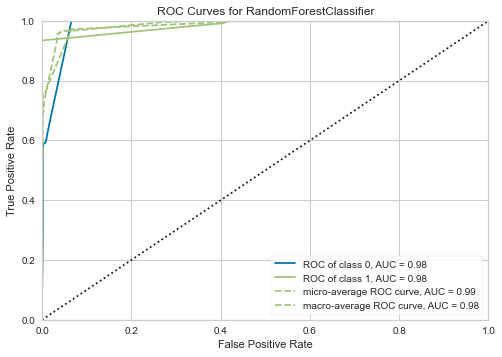

In [96]:
plot_model(tuned_rf)

#### Trying undersampling method for imbalance in dataset


In [ ]:
et=create_model('et')


In [ ]:
classifier=create_model('lightgbm')
print(classifier)

In [ ]:
classifier=create_model('gbc')
print(classifier)

In [ ]:
VP = vf['VehiclePrice'].value_counts(normalize=True)
print(VP)

In [ ]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'VehiclePrice', y = 'FraudFound_P', data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,
            order=vf['VehiclePrice'].value_counts().index,
            ci = 'sd'   
            )

print('Mean',vf.groupby(['VehiclePrice']).mean()['FraudFound_P'])
print('std dev',vf.groupby(['VehiclePrice']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

In [ ]:
classifier=create_model('rf')
print(classifier)

In [ ]:
from pycaret.classification import *